In [96]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras import models

import tensorflow as tf

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [97]:
from tensorflow.keras.models import Model
from keras.preprocessing.sequence import TimeseriesGenerator

In [98]:
import matplotlib as mpl
import os
mpl.rcParams['figure.figsize']=(18,16)
mpl.rcParams['axes.grid']=False

In [99]:
from __future__ import absolute_import, division, print_function,unicode_literals

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Model

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [102]:
import io
from google.colab import files
uploaded = files.upload()

Saving final2.csv to final2 (2).csv


In [103]:
df = pd.read_csv('final2.csv')
df

,Date,FCnt,SpFact,RSSI,SNR,Gateway,Payload (Hex),AccMotion,AccX,AccY,...,Occupancy,Pressure,Pulse1,Pulse1Abs,SoundAvg,SoundPeak,Temperature,Vdd,Waterleak,Events
0,2022-08-20 02:03:26,3743,10,-114,-1.0,1105,0100b30251070e300c00c214000f61e4,NaN,NaN,NaN,...,NaN,1008.100,NaN,NaN,NaN,NaN,17.9,3632,NaN,NaN
1,2022-08-20 02:13:26,3744,10,-110,-8.0,146,0100b30251070e300c00c214000f6181,NaN,NaN,NaN,...,NaN,1008.001,NaN,NaN,NaN,NaN,17.9,3632,NaN,NaN
2,2022-08-20 02:23:26,3745,10,-113,1.0,1105,0100b30251070e2d0c00c114000f6105,NaN,NaN,NaN,...,NaN,1007.877,NaN,NaN,NaN,NaN,17.9,3629,NaN,NaN
3,2022-08-20 02:33:26,3746,10,-113,-2.2,146,0100b20251070e300c00c114000f614d,NaN,NaN,NaN,...,NaN,1007.949,NaN,NaN,NaN,NaN,17.8,3632,NaN,NaN
4,2022-08-20 02:53:27,3748,10,-113,-1.0,1105,0100b40251070e2d0c00c114000f60c0,NaN,NaN,NaN,...,NaN,1007.808,NaN,NaN,NaN,NaN,18.0,3629,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29610,2023-03-25 23:44:43,4128,7,-114,1.0,1105,01fffe025c070e1b0c000014000f2869,NaN,NaN,NaN,...,NaN,993.385,NaN,NaN,NaN,NaN,-0.2,3611,NaN,NaN
29611,2023-03-25 23:54:43,4129,7,-111,2.2,146,01fffe025c070e1d0c000014000f28bf,NaN,NaN,NaN,...,NaN,993.471,NaN,NaN,NaN,NaN,-0.2,3613,NaN,NaN
29612,2023-03-26 00:04:43,4130,7,-113,0.0,1105,01fffe025c070e1d0c000014000f286e,NaN,NaN,NaN,...,NaN,993.390,NaN,NaN,NaN,NaN,-0.2,3613,NaN,NaN
29613,2023-03-26 00:14:43,4131,7,-114,0.0,1105,01fffd025c070e1b0c000014000f28ce,NaN,NaN,NaN,...,NaN,993.486,NaN,NaN,NaN,NaN,-0.3,3611,NaN,NaN


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29615 entries, 0 to 29614
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              29615 non-null  object 
 1   FCnt              29615 non-null  int64  
 2   SpFact            29615 non-null  int64  
 3   RSSI              29615 non-null  int64  
 4   SNR               29615 non-null  float64
 5   Gateway           29615 non-null  int64  
 6   Payload (Hex)     29615 non-null  object 
 7   AccMotion         0 non-null      float64
 8   AccX              0 non-null      float64
 9   AccY              0 non-null      float64
 10  AccZ              0 non-null      float64
 11  Analog1           0 non-null      float64
 12  Co2               0 non-null      float64
 13  ExternalDigital   0 non-null      float64
 14  ExternalDistance  0 non-null      float64
 15  ExternalTemp1     29615 non-null  float64
 16  Humidity          29615 non-null  int64 

In [106]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

<Axes: xlabel='Date'>

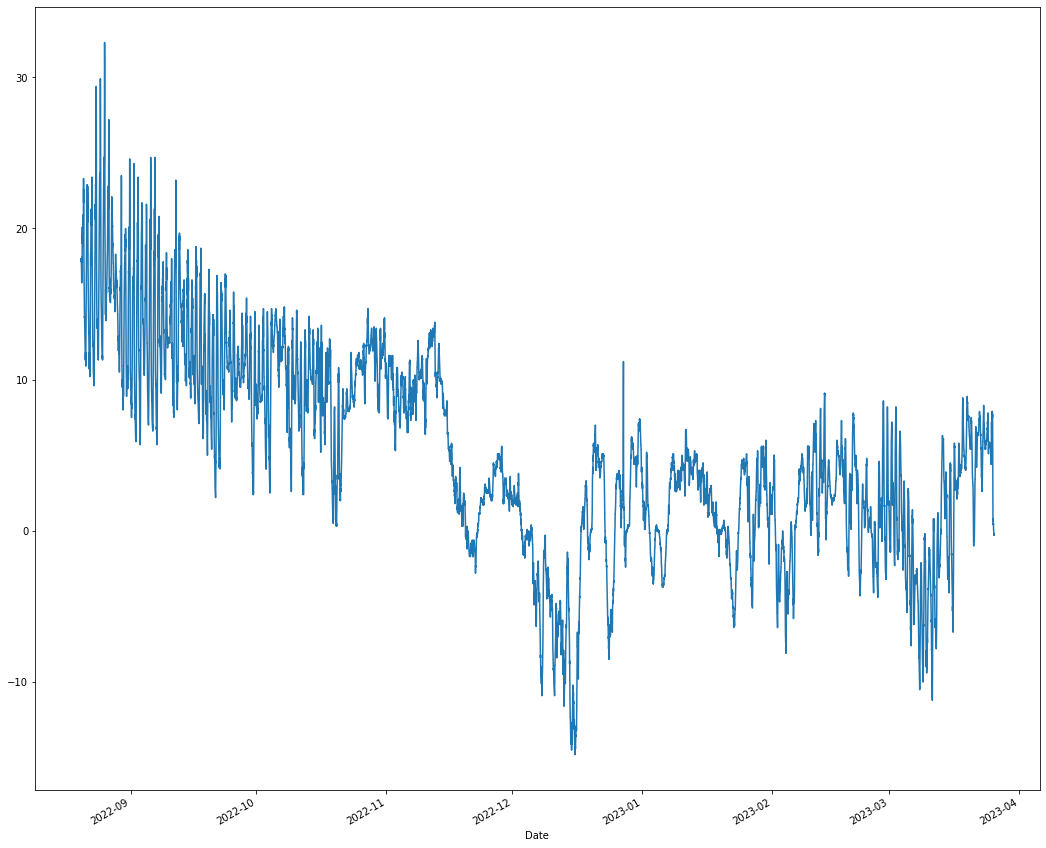

In [107]:
df.set_index('Date')['Temperature'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

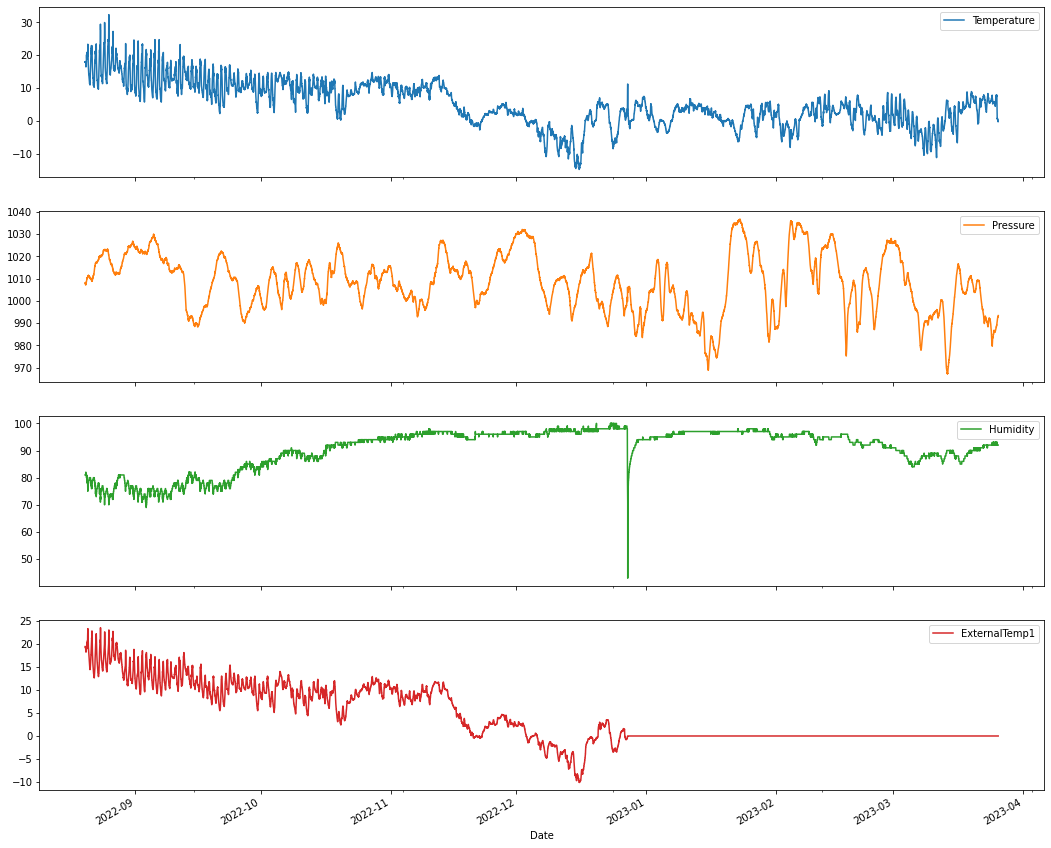

In [108]:
df.set_index('Date')[['Temperature','Pressure','Humidity','ExternalTemp1']].plot(subplots=True)

In [109]:
df_input=df[['Temperature','Pressure','Humidity','ExternalTemp1']]

In [110]:
df_input

,Temperature,Pressure,Humidity,ExternalTemp1
0,17.9,1008.100,81,19.4
1,17.9,1008.001,81,19.4
2,17.9,1007.877,81,19.3
3,17.8,1007.949,81,19.3
4,18.0,1007.808,81,19.3
...,...,...,...,...
29610,-0.2,993.385,92,0.0
29611,-0.2,993.471,92,0.0
29612,-0.2,993.390,92,0.0
29613,-0.3,993.486,92,0.0


In [111]:
df_input.describe()

,Temperature,Pressure,Humidity,ExternalTemp1
count,29615.000000,29615.000000,29615.000000,29615.000000
mean,4.995911,1008.147858,90.754280,4.362141
std,6.604632,13.002553,7.286023,6.033541
min,-14.800000,967.296000,43.000000,-10.100000
25%,0.400000,998.882500,87.000000,0.000000
50%,4.400000,1008.827000,94.000000,0.000000
75%,10.000000,1017.033500,96.000000,9.800000
max,32.300000,1036.731000,100.000000,23.500000


In [112]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [113]:
data_scaled

array([[0.69426752, 0.58765752, 0.66666667, 0.87797619],
       [0.69426752, 0.58623173, 0.66666667, 0.87797619],
       [0.69426752, 0.58444588, 0.66666667, 0.875     ],
       ...,
       [0.30997877, 0.37580471, 0.85964912, 0.30059524],
       [0.30785563, 0.3771873 , 0.85964912, 0.30059524],
       [0.30997877, 0.37705768, 0.85964912, 0.30059524]])

In [114]:
features=data_scaled
target=data_scaled[:,0]

In [115]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.69426752, 0.58765752, 0.66666667, 0.87797619],
         [0.69426752, 0.58623173, 0.66666667, 0.87797619]]]),
 array([0.69426752]))

In [116]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [117]:

x_train.shape

(23692, 4)

In [118]:

x_test.shape

(5923, 4)

In [119]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [120]:
train_generator[0]

(array([[[0.69426752, 0.58765752, 0.66666667, 0.87797619],
         [0.69426752, 0.58623173, 0.66666667, 0.87797619],
         [0.69426752, 0.58444588, 0.66666667, 0.875     ],
         ...,
         [0.75159236, 0.80234752, 0.54385965, 0.77678571],
         [0.75796178, 0.80491107, 0.54385965, 0.7797619 ],
         [0.76433121, 0.80407575, 0.54385965, 0.78571429]],
 
        [[0.69426752, 0.58623173, 0.66666667, 0.87797619],
         [0.69426752, 0.58444588, 0.66666667, 0.875     ],
         [0.69214437, 0.58548283, 0.66666667, 0.875     ],
         ...,
         [0.75796178, 0.80491107, 0.54385965, 0.7797619 ],
         [0.76433121, 0.80407575, 0.54385965, 0.78571429],
         [0.77494692, 0.80239073, 0.54385965, 0.78869048]],
 
        [[0.69426752, 0.58444588, 0.66666667, 0.875     ],
         [0.69214437, 0.58548283, 0.66666667, 0.875     ],
         [0.69639066, 0.58345215, 0.66666667, 0.875     ],
         ...,
         [0.76433121, 0.80407575, 0.54385965, 0.78571429],
        

In [121]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_4 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [123]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-123-3b00c92e395b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


718/718 [==============================] - 59s 73ms/step - loss: 0.0074 - mean_absolute_error: 0.0620 - val_loss: 0.0076 - val_mean_absolute_error: 0.0707
Epoch 2/50
718/718 [==============================] - 49s 69ms/step - loss: 0.0047 - mean_absolute_error: 0.0518 - val_loss: 0.0076 - val_mean_absolute_error: 0.0701
Epoch 3/50
718/718 [==============================] - 50s 69ms/step - loss: 0.0043 - mean_absolute_error: 0.0494 - val_loss: 0.0067 - val_mean_absolute_error: 0.0686
Epoch 4/50
718/718 [==============================] - 49s 68ms/step - loss: 0.0035 - mean_absolute_error: 0.0423 - val_loss: 0.0068 - val_mean_absolute_error: 0.0641
Epoch 5/50
718/718 [==============================] - 49s 69ms/step - loss: 0.0023 - mean_absolute_error: 0.0355 - val_loss: 0.0061 - val_mean_absolute_error: 0.0608
Epoch 6/50
718/718 [==============================] - 49s 68ms/step - loss: 0.0019 - mean_absolute_error: 0.0322 - val_loss: 0.0036 - val_mean_absolute_error: 0.0464
Epoch 7/50
718/

In [124]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-124-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.0013102436205372214, 0.027675524353981018]

In [125]:
predictions=model.predict_generator(test_generator)

<ipython-input-125-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [126]:
predictions.shape[0]

5203

In [127]:
predictions

array([[0.36140332],
       [0.3620775 ],
       [0.3630777 ],
       ...,
       [0.33768576],
       [0.33783305],
       [0.33773595]], dtype=float32)

In [128]:
y_test

array([0.42887473, 0.43524416, 0.43949045, ..., 0.30997877, 0.30785563,
       0.30997877])

In [129]:
x_test

array([[0.42887473, 0.53992943, 0.89473684, 0.30059524],
       [0.43524416, 0.53876287, 0.89473684, 0.30059524],
       [0.43949045, 0.53287247, 0.89473684, 0.30059524],
       ...,
       [0.30997877, 0.37580471, 0.85964912, 0.30059524],
       [0.30785563, 0.3771873 , 0.85964912, 0.30059524],
       [0.30997877, 0.37705768, 0.85964912, 0.30059524]])

In [130]:
x_test[:,1:][win_length:]

array([[0.64738244, 0.9122807 , 0.30059524],
       [0.64571182, 0.9122807 , 0.30059524],
       [0.64438684, 0.9122807 , 0.30059524],
       ...,
       [0.37580471, 0.85964912, 0.30059524],
       [0.3771873 , 0.85964912, 0.30059524],
       [0.37705768, 0.85964912, 0.30059524]])

In [131]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [132]:
df_pred

,0,0,1,2
0,0.361403,0.647382,0.912281,0.300595
1,0.362078,0.645712,0.912281,0.300595
2,0.363078,0.644387,0.912281,0.300595
3,0.364047,0.642169,0.912281,0.300595
4,0.364689,0.638093,0.912281,0.300595
...,...,...,...,...
5198,0.337944,0.375733,0.859649,0.300595
5199,0.337701,0.376971,0.859649,0.300595
5200,0.337686,0.375805,0.859649,0.300595
5201,0.337833,0.377187,0.859649,0.300595


In [133]:
rev_trans=scaler.inverse_transform(df_pred)

In [134]:
rev_trans

array([[   2.2220962 , 1012.247     ,   95.        ,    0.        ],
       [   2.25385046, 1012.131     ,   95.        ,    0.        ],
       [   2.30095968, 1012.039     ,   95.        ,    0.        ],
       ...,
       [   1.10499948,  993.39      ,   92.        ,    0.        ],
       [   1.11193651,  993.486     ,   92.        ,    0.        ],
       [   1.10736329,  993.477     ,   92.        ,    0.        ]])

In [135]:
df_final=df_input[predictions.shape[0]*-1:]

In [136]:
df_final.count()

Temperature      5203
Pressure         5203
Humidity         5203
ExternalTemp1    5203
dtype: int64

In [141]:
df_final['Prediction']=rev_trans[:,0]

<ipython-input-141-0749dd4f98a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Prediction']=rev_trans[:,0]


In [142]:
df_final

,Temperature,Pressure,Humidity,ExternalTemp1,App_Pred,Prediction
24412,2.4,1012.247,95,0.0,2.222096,2.222096
24413,2.5,1012.131,95,0.0,2.253850,2.253850
24414,2.5,1012.039,95,0.0,2.300960,2.300960
24415,2.5,1011.885,95,0.0,2.346636,2.346636
24416,2.5,1011.602,95,0.0,2.376874,2.376874
...,...,...,...,...,...,...
29610,-0.2,993.385,92,0.0,1.117182,1.117182
29611,-0.2,993.471,92,0.0,1.105713,1.105713
29612,-0.2,993.390,92,0.0,1.104999,1.104999
29613,-0.3,993.486,92,0.0,1.111937,1.111937


<Axes: >

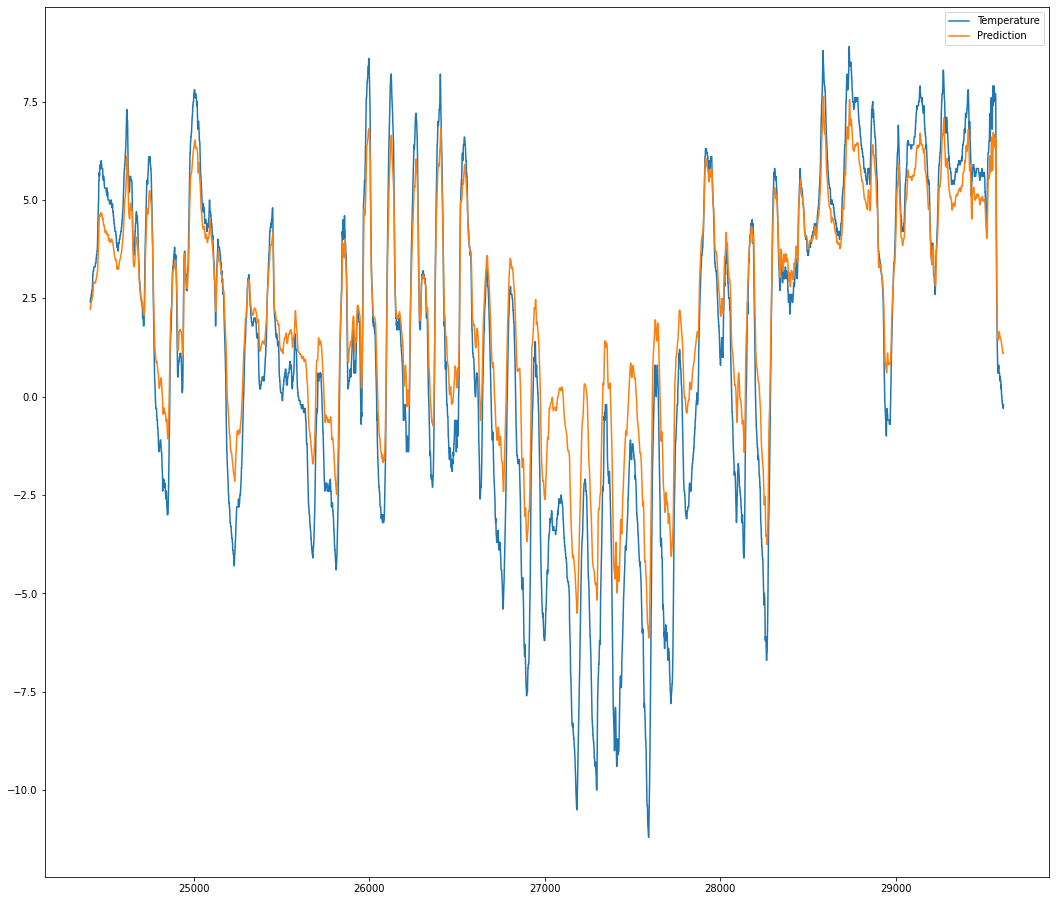

In [143]:
df_final[['Temperature','Prediction']].plot()